In [392]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creating a Test Class

In [393]:
class Test:
    def __init__(self,path):
        self.path = path
        
        self.filename = os.path.basename(path)[:-4]
        parts = self.filename.split("_")
        positions = parts[0].split("-")

        self.slide_position_one = positions[0]
        self.slide_position_two = positions[1]
        self.velocity = parts[1]
        self.slide_range = str(self.slide_position_one) + "-" + str(self.slide_position_two) + "mm"
        self.slide_start_position = float(self.slide_position_one) + 2.5

        self.data = pd.read_csv(self.path,sep='\t',skip_blank_lines=True,skiprows=4)
        self.data.rename(columns={
        'Name': 'Time (ms)'},inplace=True)

        idx = ((self.data['ActPos'].shift(1) < self.slide_start_position) & (self.data['ActPos'] >= self.slide_start_position) & (self.data['ActPos'].shift(-1) >= self.slide_start_position)).idxmax()
        self.data.drop(self.data.index[:idx],inplace=True)
        self.data['Time (ms)'] = self.data['Time (ms)'] - self.data['Time (ms)'].iloc[0]
        self.data2 = pd.DataFrame()
        self.data2 = self.data
        

    
    def __repr__(self):
        return "This Test is at {velocity}mm/s from {position_one}mm to {position_two}mm along the slide. For Debugging {slide_start_position}".format(
            velocity=self.velocity,
            position_one=self.slide_position_one,
            position_two=self.slide_position_two,
            slide_start_position = self.slide_start_position,
            )




Creating a new test for every file in the folder

In [394]:
folder = r'G:\AUTOCAD\WOS\S19S PRT update\1-Trak\Beckhoff\Testing\2023-05-19 GFX Strain Gauge Slide testing\Strain Gauge Slide Testing'

tests = []
slide_start_positions = []

for filename in os.listdir(folder):

    if filename.endswith('.csv'):

        filepath = os.path.join(folder, filename)
        test = Test(filepath)
        tests.append(test)

for i,test in enumerate(tests):
    print('Test {i}:    '.format(i=i),test)
    slide_start_positions.append(float(test.slide_position_one))
tests[0].data



Test 0:     This Test is at 4000mm/s from 187.5mm to 312.5mm along the slide. For Debugging 190.0
Test 1:     This Test is at 500mm/s from 187.5mm to 312.5mm along the slide. For Debugging 190.0
Test 2:     This Test is at 4000mm/s from 187.5mm to 812.5mm along the slide. For Debugging 190.0
Test 3:     This Test is at 500mm/s from 187.5mm to 812.5mm along the slide. For Debugging 190.0
Test 4:     This Test is at 4000mm/s from 312.5mm to 437.5mm along the slide. For Debugging 315.0
Test 5:     This Test is at 500mm/s from 312.5mm to 437.5mm along the slide. For Debugging 315.0
Test 6:     This Test is at 4000mm/s from 437.5mm to 562.5mm along the slide. For Debugging 440.0
Test 7:     This Test is at 500mm/s from 437.5mm to 562.5mm along the slide. For Debugging 440.0
Test 8:     This Test is at 4000mm/s from 562.5mm to 687.5mm along the slide. For Debugging 565.0
Test 9:     This Test is at 500mm/s from 562.5mm to 687.5mm along the slide. For Debugging 565.0
Test 10:     This Test is

,Time (ms),ActCurr,ActPos,ActVelo,SetCurr,ActCurr (1),ActHwPos,ActFollowingError
1850,0.00,0,190.031683,169.408238,1.623027,0,190.076423,0.017594
1851,0.25,0,190.086679,180.647631,1.633099,0,190.132767,0.017595
1852,0.50,0,190.133839,182.423794,1.631441,0,190.173360,0.017461
1853,0.75,0,190.178906,181.945264,1.617385,0,190.216674,0.017501
1854,1.00,0,190.221541,179.410450,1.595167,0,190.257270,0.018026
...,...,...,...,...,...,...,...,...
20196,4586.50,0,187.641382,-0.999698,0.018378,0,187.640634,-0.142932
20197,4586.75,0,187.641898,-0.319049,0.016587,0,187.642330,-0.142817
20198,4587.00,0,187.641372,-0.715288,0.014339,0,187.640932,-0.142656
20199,4587.25,0,187.641489,-0.452562,0.011716,0,187.641587,-0.142527


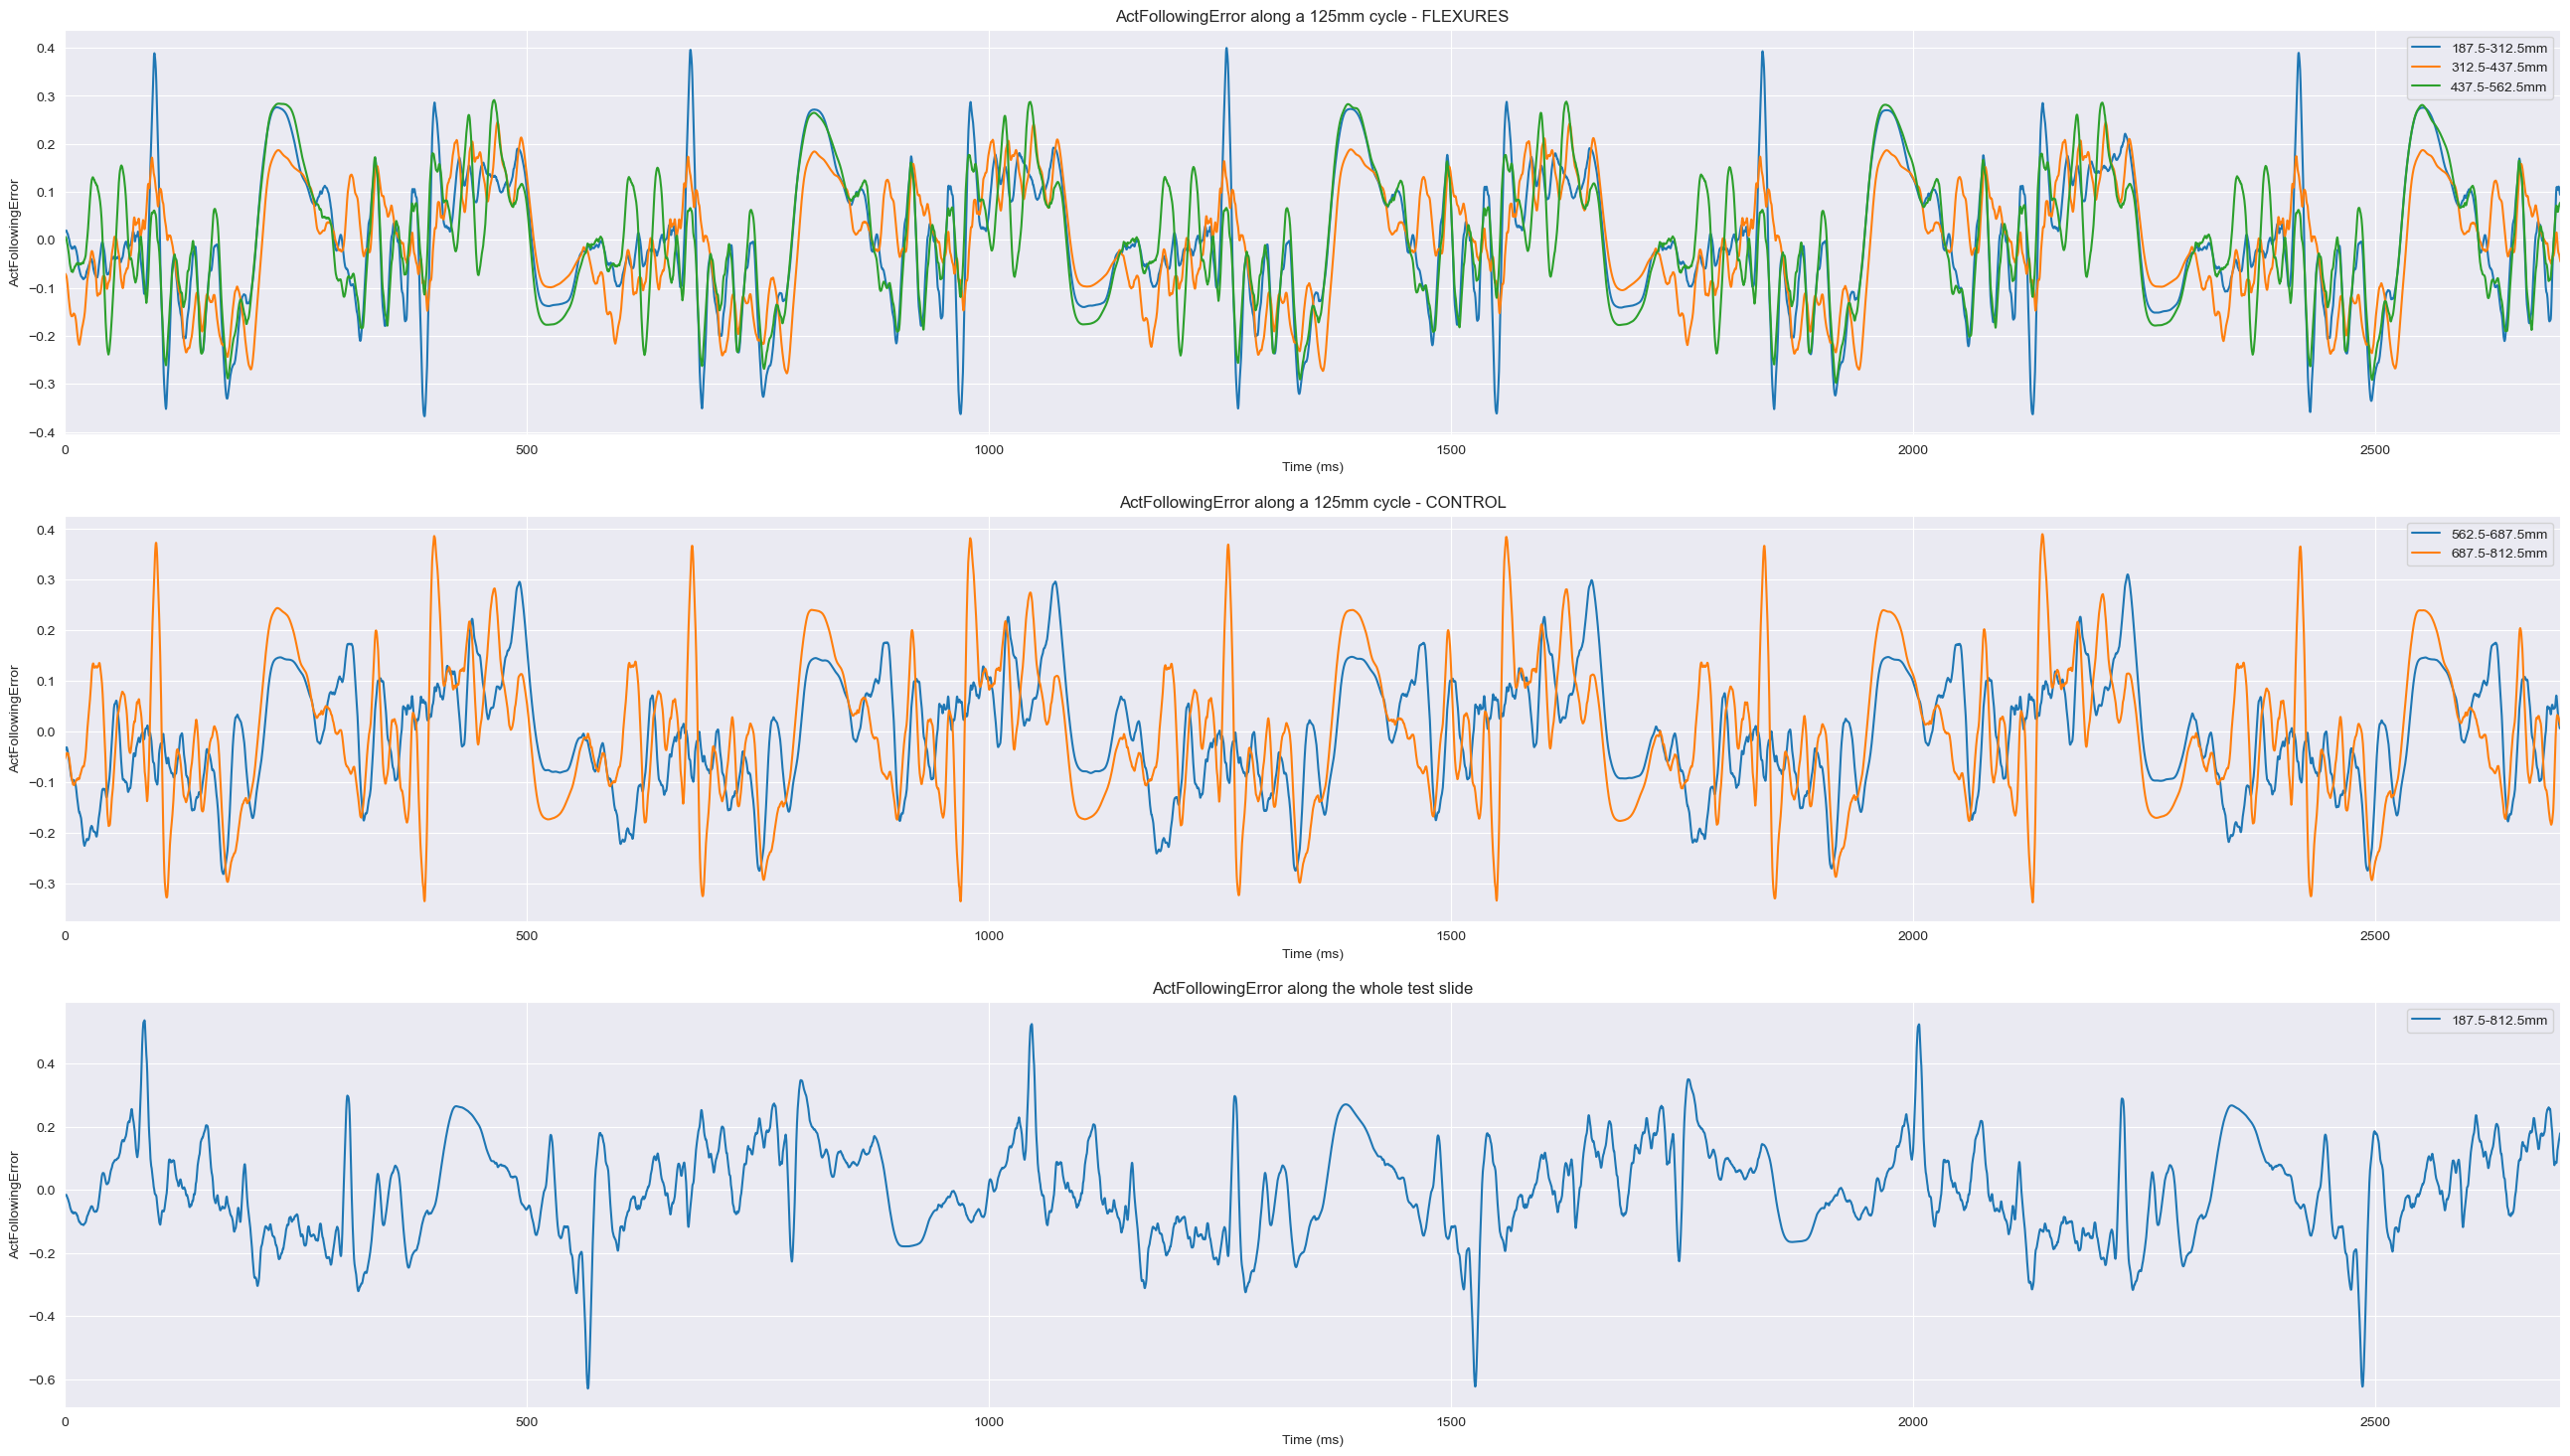

In [395]:
sns.set_style("darkgrid")
plt.figure(figsize=(18*1.8,10*1.8))
data_type = "ActFollowingError"
time_start = 0
time_end = 2700

for i in range(len(tests)):
    if tests[i].velocity == "4000":
        if i != 2 and i!=3:
            if i < 8:
                plt.subplot(3,1,1)
                sns.lineplot(data = tests[i].data,x="Time (ms)",y=data_type,label=tests[i].slide_range)
                plt.xlim(time_start,time_end)
                plt.legend(loc='upper right')
                plt.title('{data_type} along a 125mm cycle - FLEXURES'.format(data_type=data_type))
            else:
                plt.subplot(3,1,2)
                sns.lineplot(data = tests[i].data,x="Time (ms)",y=data_type,label=tests[i].slide_range)
                plt.xlim(time_start,time_end)
                plt.legend(loc='upper right')
                plt.title('{data_type} along a 125mm cycle - CONTROL'.format(data_type=data_type))

        else:
            plt.subplot(3,1,3)
            sns.lineplot(data = tests[i].data,x="Time (ms)",y=data_type,label=tests[i].slide_range)
            plt.xlim(time_start,time_end)
            plt.legend(loc='upper right')
            plt.title('{data_type} along the whole test slide'.format(data_type=data_type))


[187.5, 187.5, 187.5, 187.5, 312.5, 312.5, 437.5, 437.5, 562.5, 562.5, 687.5, 687.5]


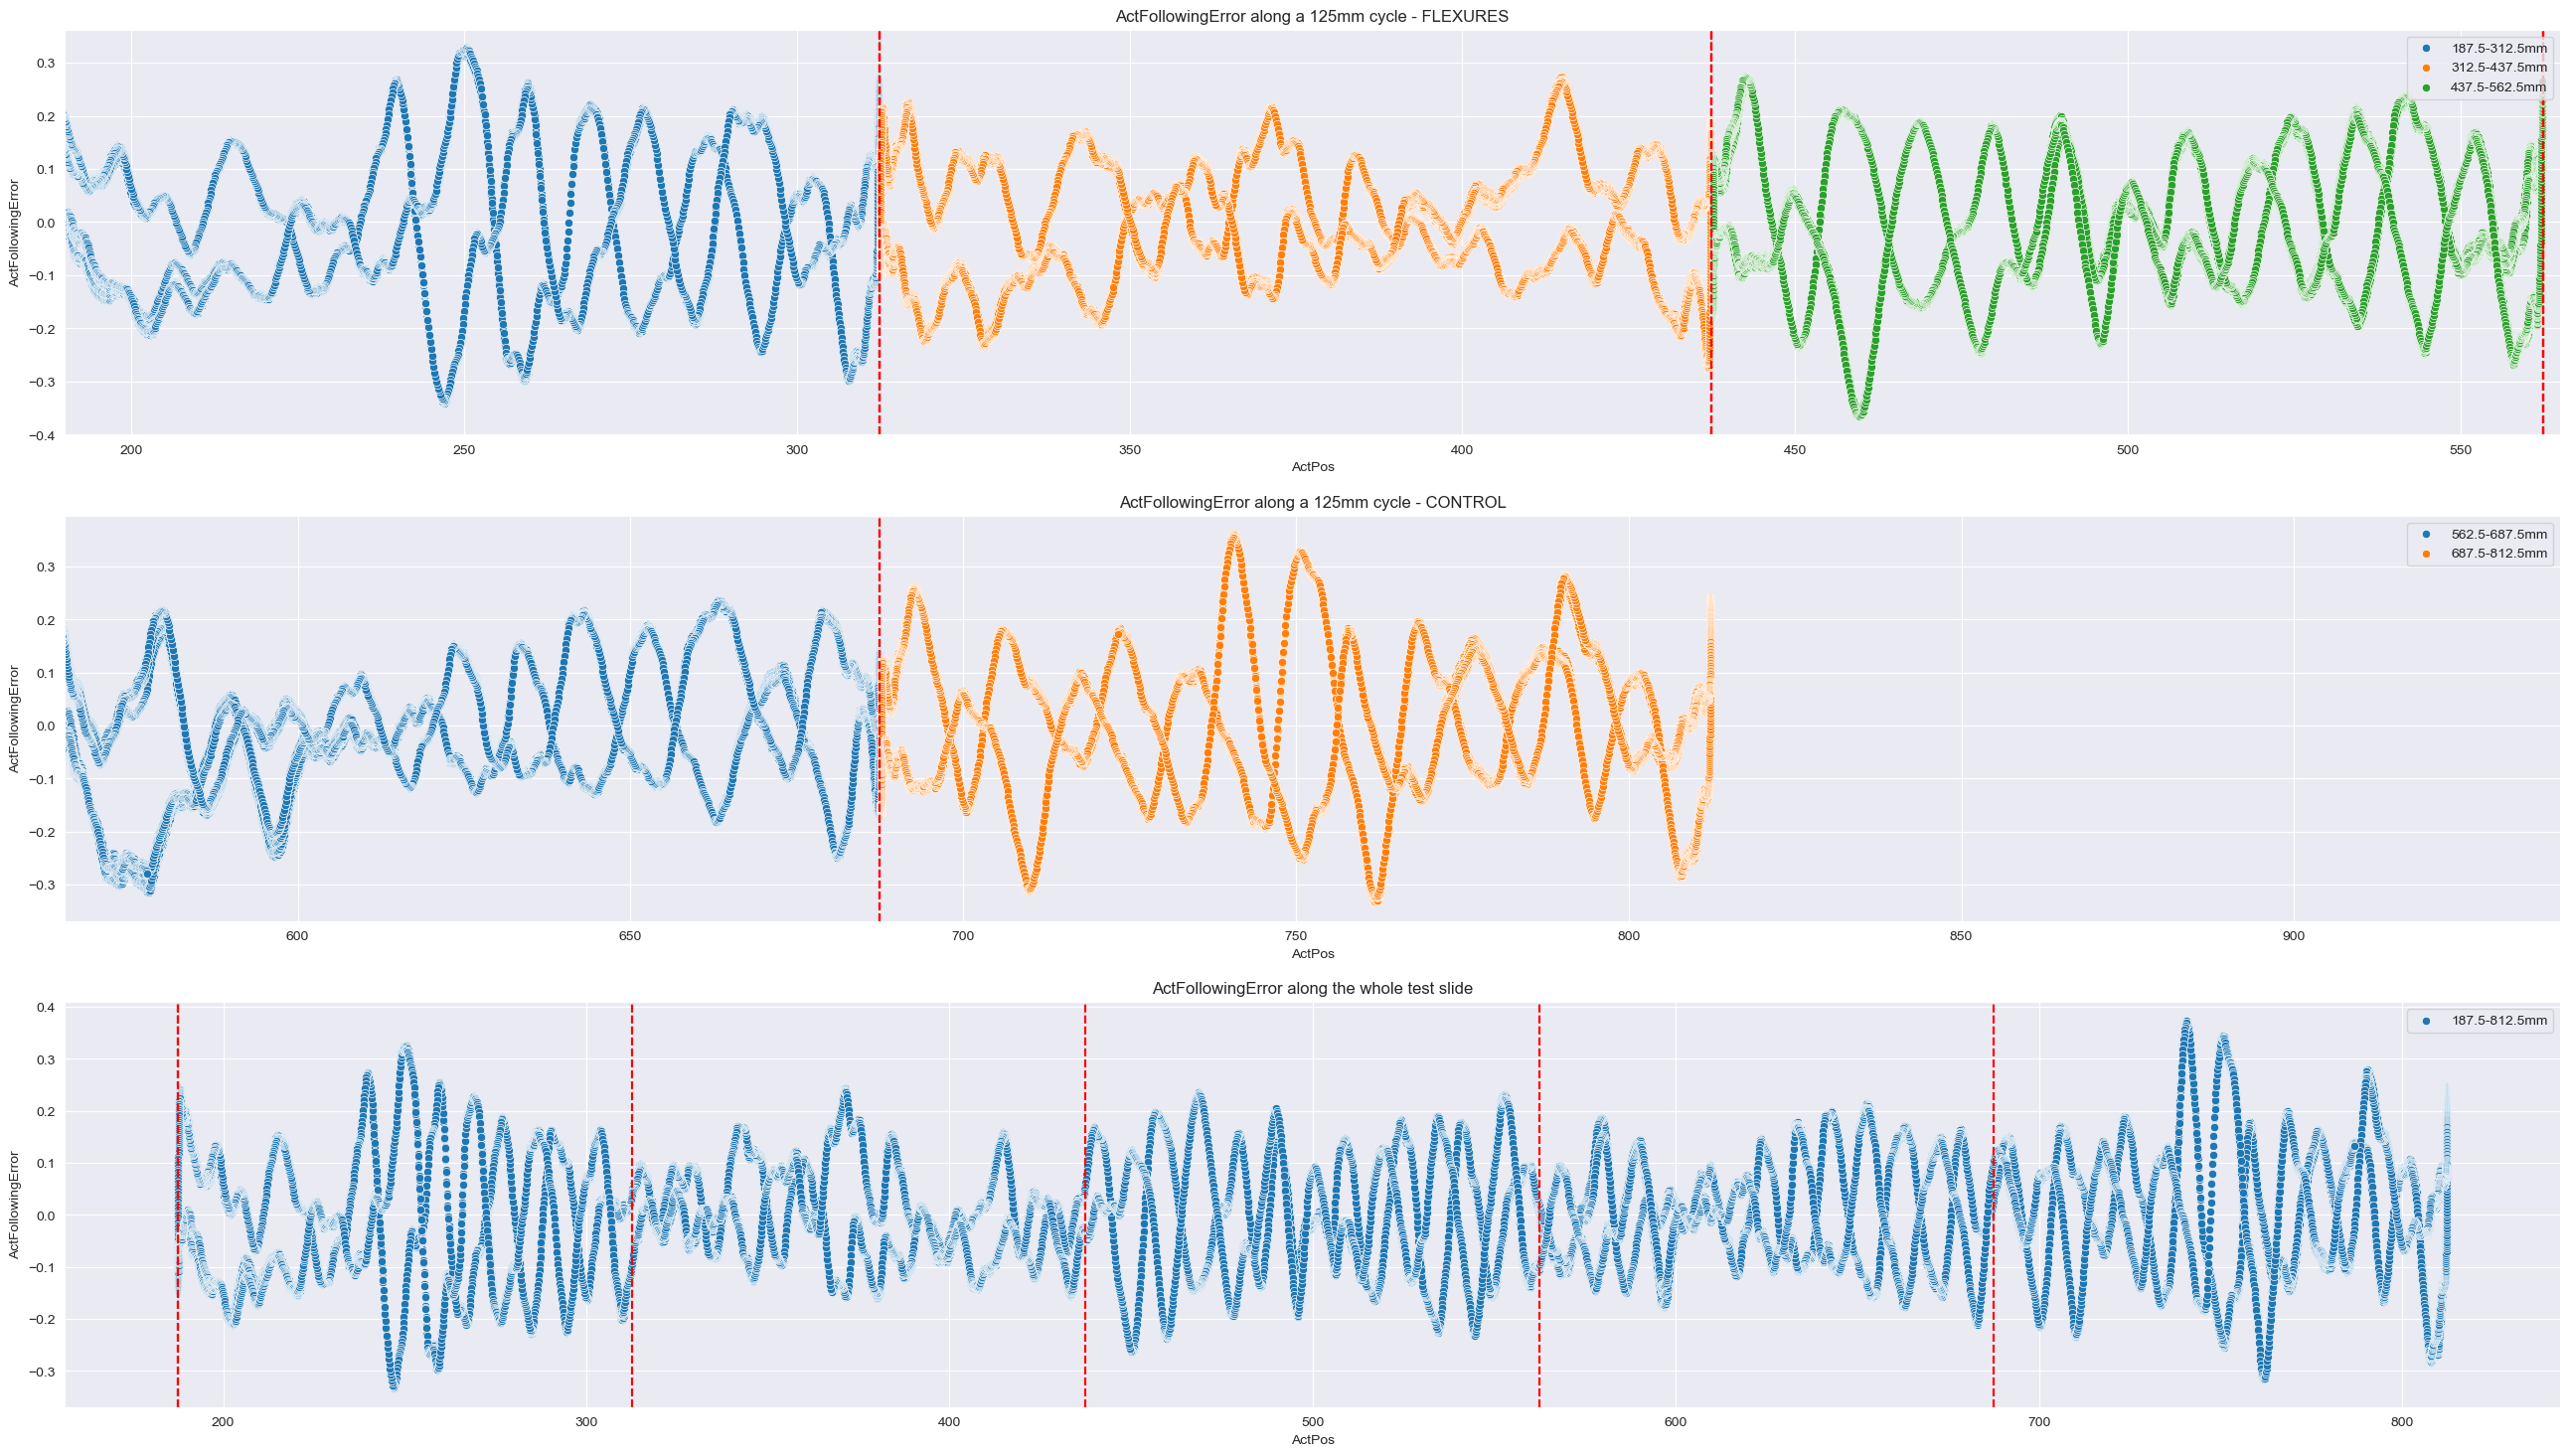

In [396]:
sns.set_style("darkgrid")
plt.figure(figsize=(18*1.8,10*1.8))
data_type = "ActFollowingError"
plot_distance = 125*3
for i in range(len(tests)):
    if tests[i].velocity == "500":
        if i != 2 and i!=3:
            if i < 8:
                plt.subplot(3,1,1)
                sns.scatterplot(data = tests[i].data,x="ActPos",y=data_type,label=tests[i].slide_range)
                plt.legend(loc='upper right')
                for x in slide_start_positions:
                    plt.axvline(x=x, color='r', linestyle='--')
                plt.title('{data_type} along a 125mm cycle - FLEXURES'.format(data_type=data_type))
                plt.xlim(190, 190 + plot_distance)
            else:
                plt.subplot(3,1,2)
                sns.scatterplot(data = tests[i].data,x="ActPos",y=data_type,label=tests[i].slide_range)
                plt.legend(loc='upper right')
                for x in slide_start_positions:
                    plt.axvline(x=x, color='r', linestyle='--')
                plt.title('{data_type} along a 125mm cycle - CONTROL'.format(data_type=data_type))
                plt.xlim(565, 565 + plot_distance)

        else:
            plt.subplot(3,1,3)
            sns.scatterplot(data = tests[i].data,x="ActPos",y=data_type,label=tests[i].slide_range)
            for x in slide_start_positions:
                plt.axvline(x=x, color='r', linestyle='--')
            plt.legend(loc='upper right')
            plt.title('{data_type} along the whole test slide'.format(data_type=data_type))
print(slide_start_positions)

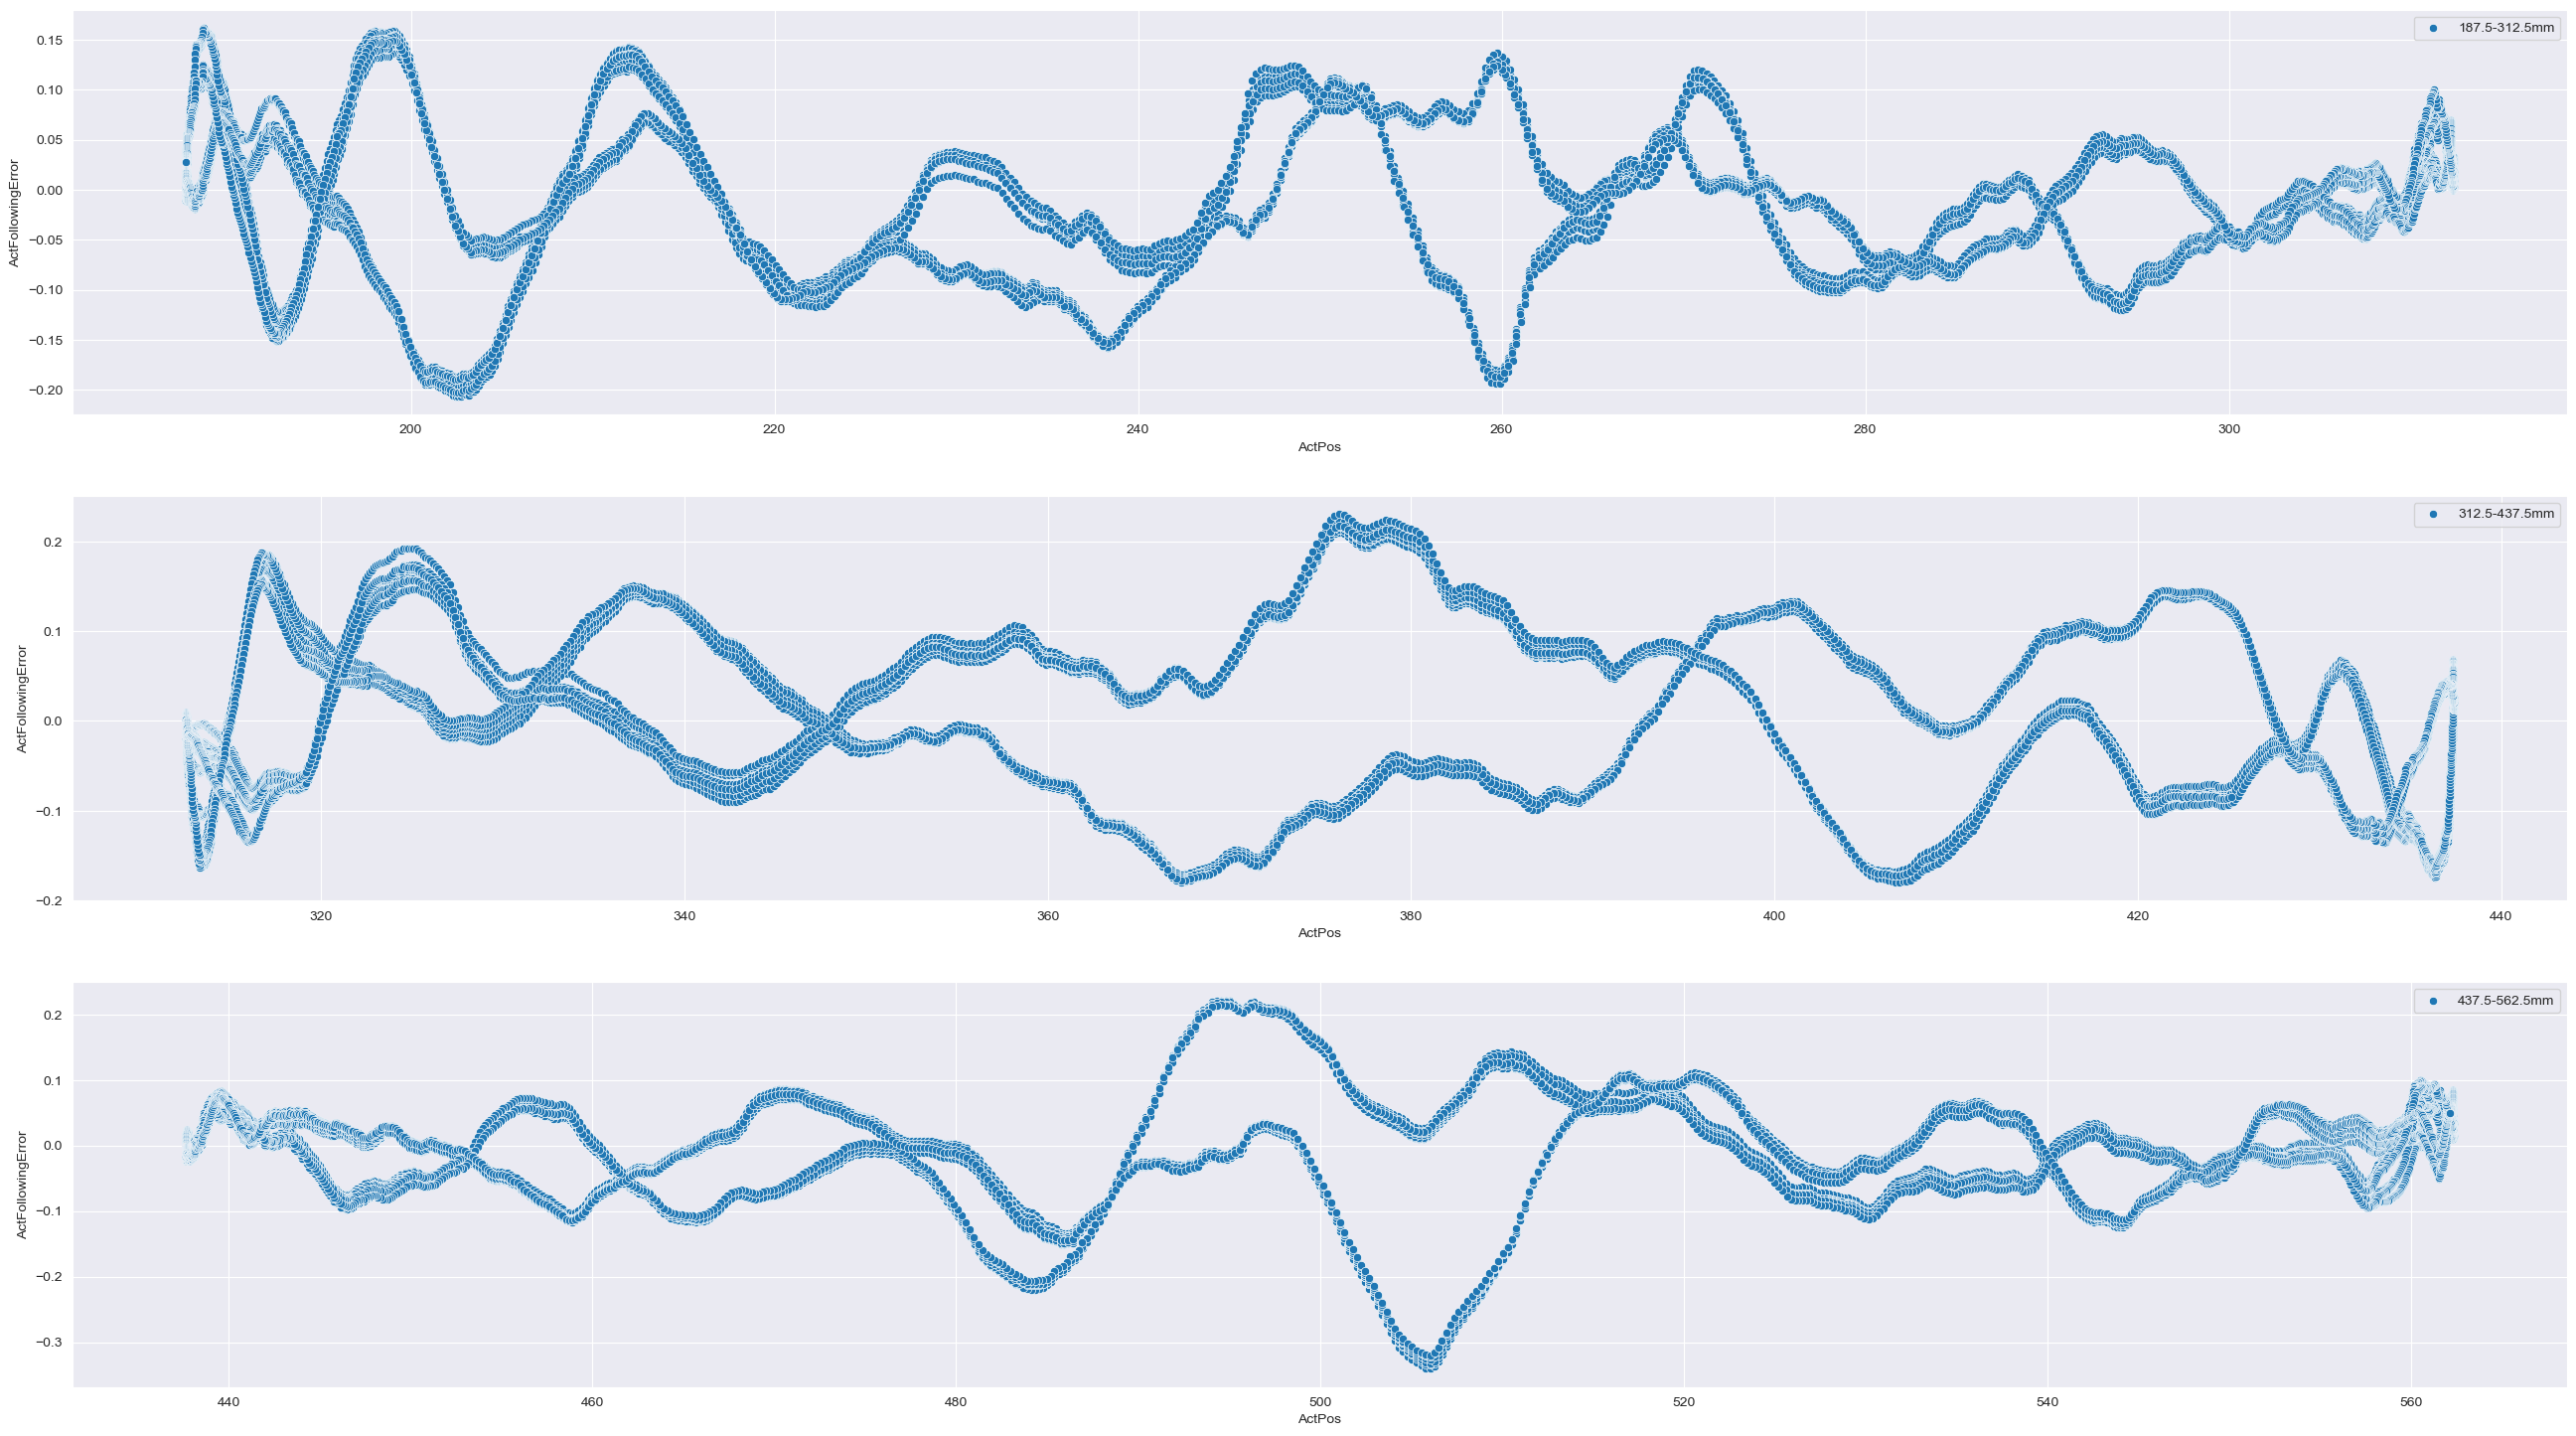

In [398]:
sns.set_style("darkgrid")
plt.figure(figsize=(18*1.8,10*1.8))
data_type = "ActFollowingError"
plot_distance = 125*3

for test in tests:
    test.data2.reset_index(drop=True, inplace=True)


concept_one = pd.DataFrame()
concept_two = pd.DataFrame()
concept_three = pd.DataFrame()

#If 500mm/s set to False if 4000mm/s set to True
speed_bool = False

if speed_bool == True:

    concept_one["ActPos"] = tests[1].data2["ActPos"]
    concept_one[data_type] = tests[1].data2[data_type] - tests[11].data2[data_type]

    concept_two["ActPos"] = tests[5].data["ActPos"]
    concept_two[data_type] = tests[5].data2[data_type] - tests[9].data2[data_type]

    concept_three["ActPos"] = tests[7].data2["ActPos"]
    concept_three[data_type] = tests[7].data2[data_type] - tests[11].data2[data_type]

else:

    concept_one["ActPos"] = tests[0].data2["ActPos"]
    concept_one[data_type] = tests[0].data2[data_type] - tests[10].data2[data_type]

    concept_two["ActPos"] = tests[4].data["ActPos"]
    concept_two[data_type] = tests[4].data2[data_type] - tests[8].data2[data_type]

    concept_three["ActPos"] = tests[6].data2["ActPos"]
    concept_three[data_type] = tests[6].data2[data_type] - tests[10].data2[data_type]




plt.subplot(3,1,1)
sns.scatterplot(data = concept_one,x="ActPos",y=data_type,label=tests[1].slide_range)
plt.legend(loc='upper right')

plt.subplot(3,1,2)
sns.scatterplot(data = concept_two,x="ActPos",y=data_type,label=tests[5].slide_range)
plt.legend(loc='upper right')

plt.subplot(3,1,3)
sns.scatterplot(data = concept_three,x="ActPos",y=data_type,label=tests[7].slide_range)
plt.legend(loc='upper right')


